# Udacity Data Analyst Nanodegree
# Project: No-Show Appointments Analysis

## Table of Contents
- [Introduction](#Introduction)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Conclusions](#Conclusions)

---
## Introduction

### Dataset Description 

The No-Show Appointments dataset includes data related to 100k medical appointments in Brazil.  
The dataset can be used to examine what factors may influece if a patient does or does not attend their medical appointment.

Source: https://www.kaggle.com/datasets/joniarroba/noshowappointments

Columns:
 - PatientId: unique identifier for patient
 - AppointmentID: unique identifier for appointment	
 - Gender: patient's gender	
 - ScheduledDay: on what day the patient set up their appointment	
 - AppointmentDay: on what day the patient will attend their appointment	
 - Age: patient's age	
 - Neighbourhood: indicates the location of the hospital	
 - Scholarship: indicates if patient is enrolled in Brasilian welfare program Bolsa Família
 - Hipertension: indicates if patient has hypertension	
 - Diabetes: indicates if patient has diabetes
 - Alcoholism: indicates if patient suffers from alcoholism
 - Handcap: indicates if patient has a disability
 - SMS_received: indicates if patient received a text	
 - No-show: ‘No’ if the patient showed up to their appointment, ‘Yes’ if they did not show up


### Question(s) for Analysis

1. Do no-show appointments occur more often during certain months than others?
2. Do no-show appointment occur more often in some neighborhoods than others?
3. Does the text message reminder influence if the patient attends the appointment?


In [1]:
# import 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 'magic word' so visualizations are plotted inline  
%matplotlib inline

---
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# read the data to a dataframe
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

# view some rows of data
display(df.head())

# get column types and counts
display(df.info())

# view distinct neighborhoods
print(df['Neighbourhood'].unique())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


None

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'



### Data Cleaning

Issues Identified:
1. Convert ScheduledDay from object to datetime64
2. Convert AppointmentDay from object to datetime64
3. Show the full PatientId instead of scientific notation
4. Change the column name of "Handcap" to "Disabled"
5. Change the column name of "Hipertension" to "Hypertension"
6. Change SMS_cleaned to yes or no values


#### Make a copy of the dataframe

In [3]:
df_clean = df

#### Issue 1: Convert ScheduledDay from object to datetime64

In [4]:
df_clean["ScheduledDay"] = pd.to_datetime(df_clean["ScheduledDay"])
display(df_clean["ScheduledDay"].head())

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

#### Issue 2: Convert AppointmentDay from object to datetime64 and add month-year column

In [5]:
df_clean["AppointmentDay"] = pd.to_datetime(df_clean["AppointmentDay"]).dt.date
df_clean["ApptMonthYr"] = pd.to_datetime(df_clean["AppointmentDay"]).dt.to_period('M')
display(df_clean[["AppointmentDay","ApptMonthYr"]].head())

,AppointmentDay,ApptMonthYr
0,2016-04-29,2016-04
1,2016-04-29,2016-04
2,2016-04-29,2016-04
3,2016-04-29,2016-04
4,2016-04-29,2016-04


#### Issue 3: Show the full PatientId instead of scientific notation

In [6]:
pd.options.display.float_format = '{:.0f}'.format
display(df_clean[["PatientId"]].head())

,PatientId
0,29872499824296
1,558997776694438
2,4262962299951
3,867951213174
4,8841186448183


#### Issue 4. Change the column name of "Handcap" to "Disabled"

In [7]:
df_clean.rename({'Handcap':'Disabled'}, axis='columns', inplace=True)
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Disabled        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

None

#### Issue 5. Change the column name of "Hipertension" to "Hypertension"

In [8]:
df_clean.rename({'Hipertension':'Hypertension'}, axis='columns', inplace=True)
display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  object             
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Disabled        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

None

#### Issue 6. Change SMS_cleaned to yes or no values

In [9]:
df_clean['SMS_received_yn'] = np.where(df_clean['SMS_received'] == 0, 'No', 'Yes')
display(df_clean.head())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No-show,ApptMonthYr,SMS_received_yn
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04,No


---
## Exploratory Data Analysis

Questions: 

Q1: Do no-show appointments occur more often during certain months than others?  
Q2: Does the text message reminder influence if the patient attends the appointment?  
Q3: What percentage of total appointments were no-show appointments?  

#### Create values for attended and no-shows

In [10]:
# get total appts
total_rows = df_clean.shape[0]

# get attended appts
yes_shows = df_clean[df_clean['No-show'] == 'No']
display(yes_shows.head())

# get no-show appts
no_shows = df_clean[df_clean['No-show'] == 'Yes']
display(no_shows.head())


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No-show,ApptMonthYr,SMS_received_yn
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04,No


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No-show,ApptMonthYr,SMS_received_yn
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04,No
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2016-04,No
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2016-04,Yes
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,2016-04,No
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2016-04,No


### Functions

In [11]:
def get_attended(col,agg):
    '''get all rows where patient attended, aggregate column by count or proportion'''
    if agg == 'count':
        yes_vals = yes_shows[col].value_counts().sort_index(ascending=True)
    elif agg == 'percent':    
        yes_vals = yes_shows[col].value_counts(normalize=True).sort_index(ascending=True)        
    return yes_vals

def get_noshows(col,agg):
    '''get all rows where patient no showed, aggregate column by count or proportion'''
    if agg == 'count':
        no_vals  = no_shows[col].value_counts().sort_index(ascending=True)
    elif agg == 'percent':
        no_vals  = no_shows[col].value_counts(normalize=True).sort_index(ascending=True)
    return no_vals

### Q1: Do no-show appointments occur more often during certain months than others?

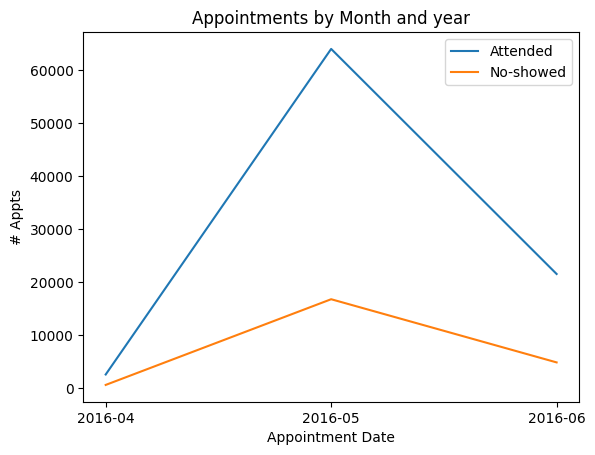

Total Counts by Month and Attendance


ApptMonthYr  No-show
2016-04      No          2602
             Yes          633
2016-05      No         64037
             Yes        16804
2016-06      No         21569
             Yes         4882
Name: count, dtype: int64

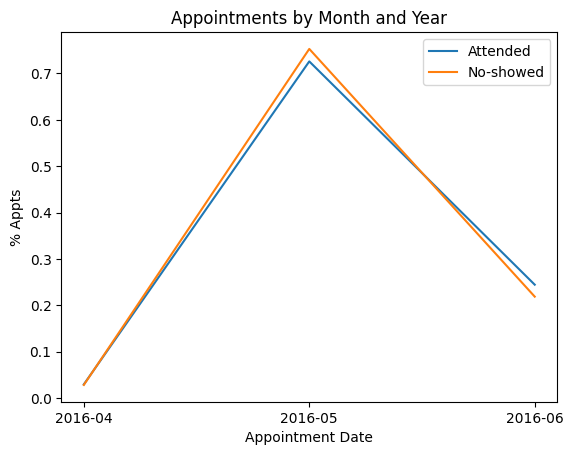

Total Counts by Month and Attendance


ApptMonthYr  No-show
2016-04      No        1
             Yes       0
2016-05      No        1
             Yes       0
2016-06      No        1
             Yes       0
Name: proportion, dtype: float64

In [12]:
# get months
months = df_clean['ApptMonthYr'].astype(str)
months = list(months.unique())
x = months
#print(months)

# get attended and no-showed by count
y1 = get_attended('ApptMonthYr','count')
y2 = get_noshows('ApptMonthYr','count')

# create the plot
plt.plot(x, y1, label ='Attended')
plt.plot(x, y2, label ='No-showed')

plt.xlabel("Appointment Date")
plt.ylabel("# Appts")
plt.title("Appointments by Month and year")
plt.legend()
plt.show()

# total counts
print("Total Counts by Month and Attendance")
display(df_clean.groupby('ApptMonthYr')['No-show'].value_counts().sort_index(ascending=True))


# get attended and no-showed by percent
y1 = get_attended('ApptMonthYr','percent')
y2 = get_noshows('ApptMonthYr','percent')

# create the plot
plt.plot(x, y1, label ='Attended')
plt.plot(x, y2, label ='No-showed')

plt.xlabel("Appointment Date")
plt.ylabel("% Appts")
plt.title("Appointments by Month and Year")
plt.legend()
plt.show()

# total counts
print("Total Counts by Month and Attendance")
display(df_clean.groupby('ApptMonthYr')['No-show'].value_counts(normalize=True).sort_index(ascending=True)) 

- May had the highest percentage of no-shows.  
- June had the lowest percentage of no-shows.

| Apr No-show  | Number | Percent |
| -------  | ------     | -----   |
|     No   |   2602     | 80
|    Yes   |   633      | 20
|    Total |   3235     | |

| May No-show  | Number |Percent  |
| -------      | ------ |------     |
|       No     |  64037 | 79 |
|    Yes       |  16804 | 21 |
|    Total     | 80,841 | |

| Jun No-show  | Number |Percent  |
| -------  | ------ |------     |
|     No   |  21569 | 82 |
|     Yes  |   4882 | 18 |
|    Total | 26451  | |


### Q2: Does the text message reminder influence if the patient attends the appointment?

Attended Appts:


SMS_received_yn
No     62510
Yes    25698
Name: count, dtype: int64


No-show Appts:


SMS_received_yn
No     12535
Yes     9784
Name: count, dtype: int64

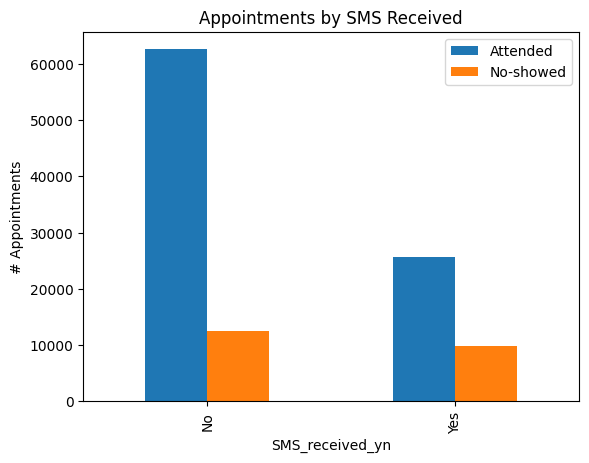

Attended Appts:


SMS_received_yn
No    1
Yes   0
Name: proportion, dtype: float64


No-show Appts:


SMS_received_yn
No    1
Yes   0
Name: proportion, dtype: float64

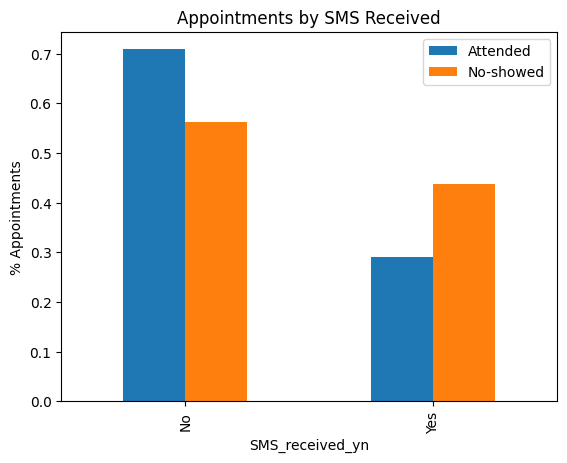

In [13]:
sms = list(df_clean['SMS_received_yn'].unique())
#print(sms)

# get attended and no-showed by count
y1 = get_attended('SMS_received_yn','count')
y2 = get_noshows('SMS_received_yn','count')

print("Attended Appts:")
display(y1)

print("\nNo-show Appts:")
display(y2)

# create the plot
chart = pd.concat(
    [
        y1.rename('Attended'), 
        y2.rename('No-showed') 
    ],
    axis=1,
).plot.bar()
chart.set_title('Appointments by SMS Received')
chart.set_ylabel('# Appointments')
plt.show()


# get attended and no-showed by percent
y1 = get_attended('SMS_received_yn','percent')
y2 = get_noshows('SMS_received_yn','percent')

print("Attended Appts:")
display(y1)

print("\nNo-show Appts:")
display(y2)

# create the plot
chart = pd.concat(
    [
        y1.rename('Attended'), 
        y2.rename('No-showed') 
    ],
    axis=1,
).plot.bar()
chart.set_title('Appointments by SMS Received')
chart.set_ylabel('% Appointments')
plt.show()

- The receipt of a SMS text message did not appear to make a positive impact on the attendance.    
    - The no-show rate for patients who received a text was higher than when patients did not receive a text.   
|SMS received| Attended | No-show | Total   | No-show Rate |
| -          | -        | -       | -       | -            |
| No         |  62,510  | 12,535  | 75,045  | 17%          |
| Yes        |  25,698  | 9,784   | 35,482  | 28%          |
| Total      |  88,208  | 22,319  | 110,527 | 20%          |

### Q3: What percentage of total appointments were no-show appointments?

No-show
No    80
Yes   20
Name: count, dtype: float64


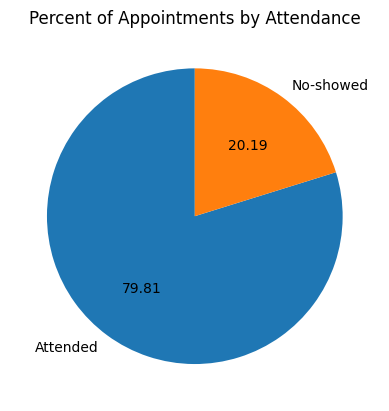

In [14]:
y  = ((df_clean['No-show'].value_counts()) / total_rows) * 100
print(y)

# create the plot
lbl = ["Attended", "No-showed"]
plt.pie(y, labels = lbl, startangle = 90, autopct='%.2f')
plt.title('Percent of Appointments by Attendance')
plt.show() 

- 80% of total appointments were attended
- 20% of total appointments were no-showed

---
## Conclusions

Analysis:

- Of the 110,527 total appointments in the dataset, 20% were no-shows while the remaining 80% were attended.  

<br>  

- Each of the three months studied reported lower counts of no-shows than attended appointments.   
    - May had the highest percentage of no-shows, while June had the least.  

| Apr No-show  | Number | Percent |
| -------  | ------     | -----   |
|     No   |   2602     | 80
|    Yes   |   633      | 20
|    Total |   3235     | |

| May No-show  | Number |Percent  |
| -------      | ------ |------     |
|       No     |  64037 | 79 |
|    Yes       |  16804 | 21 |
|    Total     | 80,841 | |

| Jun No-show  | Number |Percent  |
| -------  | ------ |------     |
|     No   |  21569 | 82 |
|     Yes  |   4882 | 18 |
|    Total | 26451  | |
    
<br>  
  
- The receipt of a SMS text message did not appear to make a positive impact on the attendance.    
    - The no-show rate for patients who received a text was higher than when patients did not receive a text.   
|SMS received| Attended | No-show | Total   | No-show Rate |
| -          | -        | -       | -       | -            |
| No         |  62,510  | 12,535  | 75,045  | 17%          |
| Yes        |  25,698  | 9,784   | 35,482  | 28%          |
| Total      |  88,208  | 22,319  | 110,527 | 20%          |

### Limitation

- A limitation of this analysis is the time-period available. Because only three months were included in the dataset, it is not possible to provide an analysis representative of the entire year. Other factors may come into play such as changing seasons and weather, school attendance, or holidays, that would not have been accounted for in this dataset.
